In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import joblib


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("C:/Users/Subashree/Downloads/heart_disease_dataset.csv")


# Quick overview
print(data.head())







   age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0   58    1                1                     134          246   
1   52    0                2                     112          245   
2   59    0                2                     126          196   
3   67    1                1                     165          201   
4   51    1                0                     146          174   

   fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_induced_angina  \
0                    0            0             155                        0   
1                    0            0             143                        1   
2                    0            0             162                        1   
3                    0            0             180                        0   
4                    1            1             133                        1   

   st_depression  st_slope  num_major_vessels  thalassemia  heart_disease  
0            0.4         1  

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    int64  
 1   sex                      400 non-null    int64  
 2   chest_pain_type          400 non-null    int64  
 3   resting_blood_pressure   400 non-null    int64  
 4   cholesterol              400 non-null    int64  
 5   fasting_blood_sugar      400 non-null    int64  
 6   resting_ecg              400 non-null    int64  
 7   max_heart_rate           400 non-null    int64  
 8   exercise_induced_angina  400 non-null    int64  
 9   st_depression            400 non-null    float64
 10  st_slope                 400 non-null    int64  
 11  num_major_vessels        400 non-null    int64  
 12  thalassemia              400 non-null    int64  
 13  heart_disease            400 non-null    int64  
dtypes: float64(1), int64(13)
m

In [5]:
print(data.describe())

              age         sex  chest_pain_type  resting_blood_pressure  \
count  400.000000  400.000000       400.000000              400.000000   
mean    53.667500    0.662500         1.712500              123.630000   
std      8.508403    0.473449         1.035628               16.567114   
min     29.000000    0.000000         0.000000               94.000000   
25%     48.000000    0.000000         1.000000              112.000000   
50%     54.000000    1.000000         2.000000              124.000000   
75%     59.000000    1.000000         3.000000              135.000000   
max     77.000000    1.000000         3.000000              174.000000   

       cholesterol  fasting_blood_sugar  resting_ecg  max_heart_rate  \
count   400.000000           400.000000   400.000000      400.000000   
mean    216.627500             0.140000     0.530000      146.717500   
std      41.379941             0.347422     0.533678       21.104293   
min     126.000000             0.000000     0

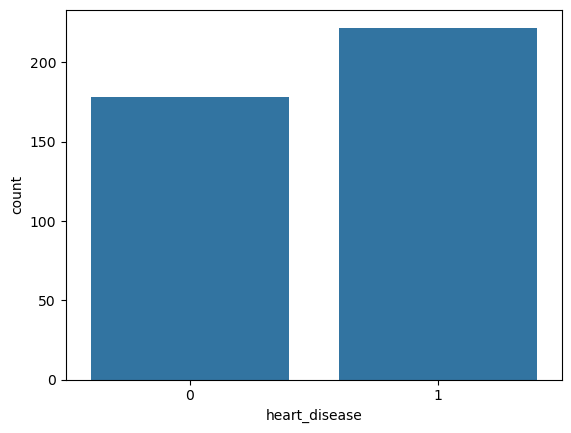

In [6]:
# Check target distribution
sns.countplot(x='heart_disease', data=data)
plt.show()


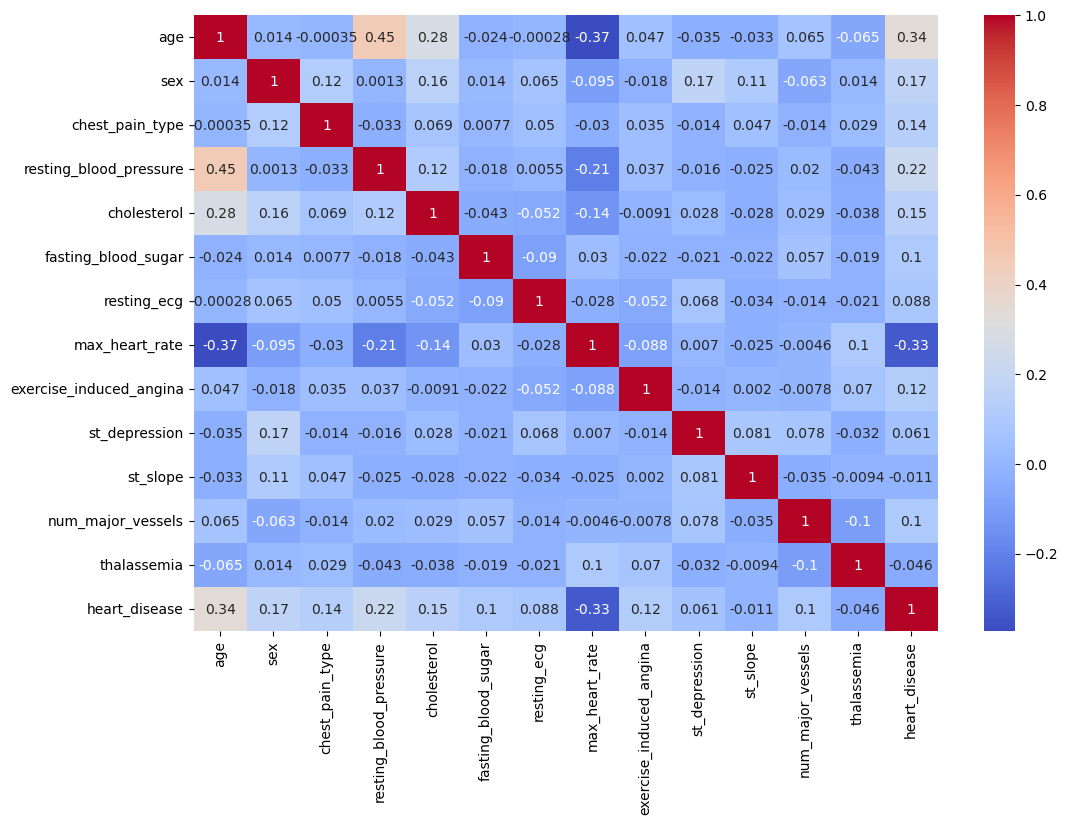

In [7]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X = data.drop('heart_disease', axis=1)
y = data['heart_disease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:

models = {}  # create an empty dictionary to store models
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
models["Decision Tree"] = dt_model

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
models["Random Forest"] = rf_model

In [14]:
# Logistic Regression (with scaling)
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='lbfgs'))
lr_pipeline.fit(X_train, y_train)
models["Logistic Regression"] = lr_pipeline

In [15]:
svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(X_train, y_train)
models["SVM"] = svm_pipeline

In [16]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    # Get predicted probabilities if available (for ROC-AUC)
    try:
        y_prob = model.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, y_prob)
    except:
        roc_auc = None
    print(f"\n---{name}---")
    print(classification_report(y_test, y_pred))
    if roc_auc is not None:
        print("ROC-AUC:", roc_auc)
    results.append((name, classification_report(y_test, y_pred, output_dict=True), roc_auc))


---Decision Tree---
              precision    recall  f1-score   support

           0       0.47      0.44      0.45        34
           1       0.60      0.63      0.62        46

    accuracy                           0.55        80
   macro avg       0.54      0.54      0.54        80
weighted avg       0.55      0.55      0.55        80

ROC-AUC: 0.5358056265984655

---Random Forest---
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        34
           1       0.67      0.70      0.68        46

    accuracy                           0.62        80
   macro avg       0.61      0.61      0.61        80
weighted avg       0.62      0.62      0.62        80

ROC-AUC: 0.6192455242966751

---Logistic Regression---
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        34
           1       0.79      0.65      0.71        46

    accuracy                           0.70        80
   

In [17]:
comparison_df = pd.DataFrame({
    "Model": [r[0] for r in results],
    "F1-score": [r[1]['1']['f1-score'] for r in results],
    "ROC-AUC": [r[2] for r in results]
})
print("\nModel Comparison:\n", comparison_df)


Model Comparison:
                  Model  F1-score   ROC-AUC
0        Decision Tree  0.617021  0.535806
1        Random Forest  0.680851  0.619246
2  Logistic Regression  0.714286  0.714194
3                  SVM  0.717391  0.700767


In [19]:

best_model = lr_pipeline
joblib.dump(best_model, 'best_heart_model.pkl')
  # no spaces


['best_heart_model.pkl']